In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime
from pytz import timezone
import pytz
from sklearn.ensemble import RandomForestClassifier #random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import plotly.express as px 


/Users/tharunkumarvardhineni/anaconda3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dataset = pd.read_csv('SolarPrediction.csv')
dataset = dataset.sort_values(['UNIXTime'], ascending = [True])
print(dataset.shape)
dataset.head()

(32686, 11)


UNIXTime                  Data      Time  Radiation  Temperature  \
7416  1472724008  9/1/2016 12:00:00 AM  00:00:08       2.58           51   
7415  1472724310  9/1/2016 12:00:00 AM  00:05:10       2.83           51   
7414  1472725206  9/1/2016 12:00:00 AM  00:20:06       2.16           51   
7413  1472725505  9/1/2016 12:00:00 AM  00:25:05       2.21           51   
7412  1472725809  9/1/2016 12:00:00 AM  00:30:09       2.25           51   

      Pressure  Humidity  WindDirection(Degrees)  Speed TimeSunRise TimeSunSet  
7416     30.43       103                   77.27  11.25    06:07:00   18:38:00  
7415     30.43       103                  153.44   9.00    06:07:00   18:38:00  
7414     30.43       103                  142.04   7.87    06:07:00   18:38:00  
7413     30.43       103                  144.12  18.00    06:07:00   18:38:00  
7412     30.43       103                   67.42  11.25    06:07:00   18:38:00

In [4]:
dataset.describe()


UNIXTime     Radiation   Temperature      Pressure      Humidity  \
count  3.268600e+04  32686.000000  32686.000000  32686.000000  32686.000000   
mean   1.478047e+09    207.124697     51.103255     30.422879     75.016307   
std    3.005037e+06    315.916387      6.201157      0.054673     25.990219   
min    1.472724e+09      1.110000     34.000000     30.190000      8.000000   
25%    1.475546e+09      1.230000     46.000000     30.400000     56.000000   
50%    1.478026e+09      2.660000     50.000000     30.430000     85.000000   
75%    1.480480e+09    354.235000     55.000000     30.460000     97.000000   
max    1.483265e+09   1601.260000     71.000000     30.560000    103.000000   

       WindDirection(Degrees)         Speed  
count            32686.000000  32686.000000  
mean               143.489821      6.243869  
std                 83.167500      3.490474  
min                  0.090000      0.000000  
25%                 82.227500      3.370000  
50%                147.700000      5.620000  
75%                179.310000      7.870000  
max                359.950000     40.500000

In [5]:
dataset.isnull().sum()


UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

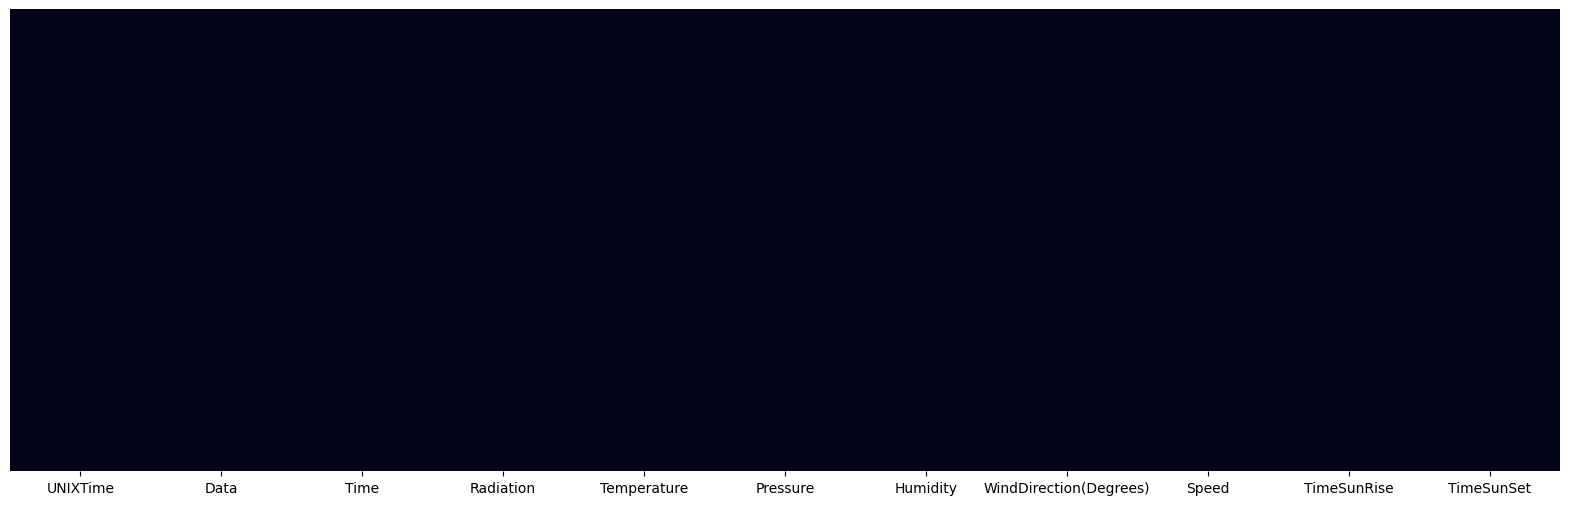

In [6]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(dataset.isnull(), cbar=False, yticklabels=False);

In [7]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 7416 to 24522
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 3.0+ MB


In [8]:
hawaii= timezone('Pacific/Honolulu')
dataset.index =  pd.to_datetime(dataset['UNIXTime'], unit='s')
dataset.index = dataset.index.tz_localize(pytz.utc).tz_convert(hawaii)
dataset['MonthOfYear'] = dataset.index.strftime('%m').astype(int)
dataset['DayOfYear'] = dataset.index.strftime('%j').astype(int)
dataset['WeekOfYear'] = dataset.index.strftime('%U').astype(int)
dataset['Hour'] = dataset.index.hour
dataset['Month'] = dataset.index.month
dataset['Date'] = dataset.index.date

dataset['TimeSunRise'] = pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.time
dataset['TimeSunSet'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.time
dataset['Total_time'] = pd.to_datetime(dataset['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(dataset['TimeSunRise'], format='%H:%M:%S').dt.hour

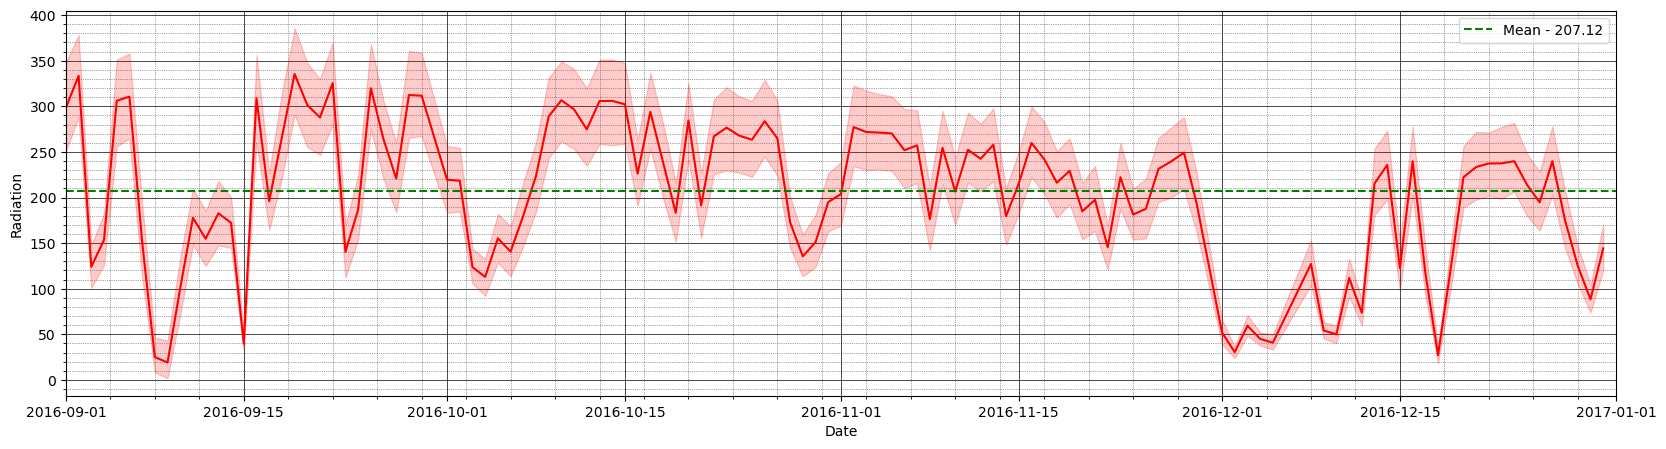

In [9]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Radiation", color = "red")

mean_avg=dataset['Radiation'].mean()
ax.axhline(mean_avg, color='green', linestyle='--', label=f"Mean - {mean_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

ax.legend();

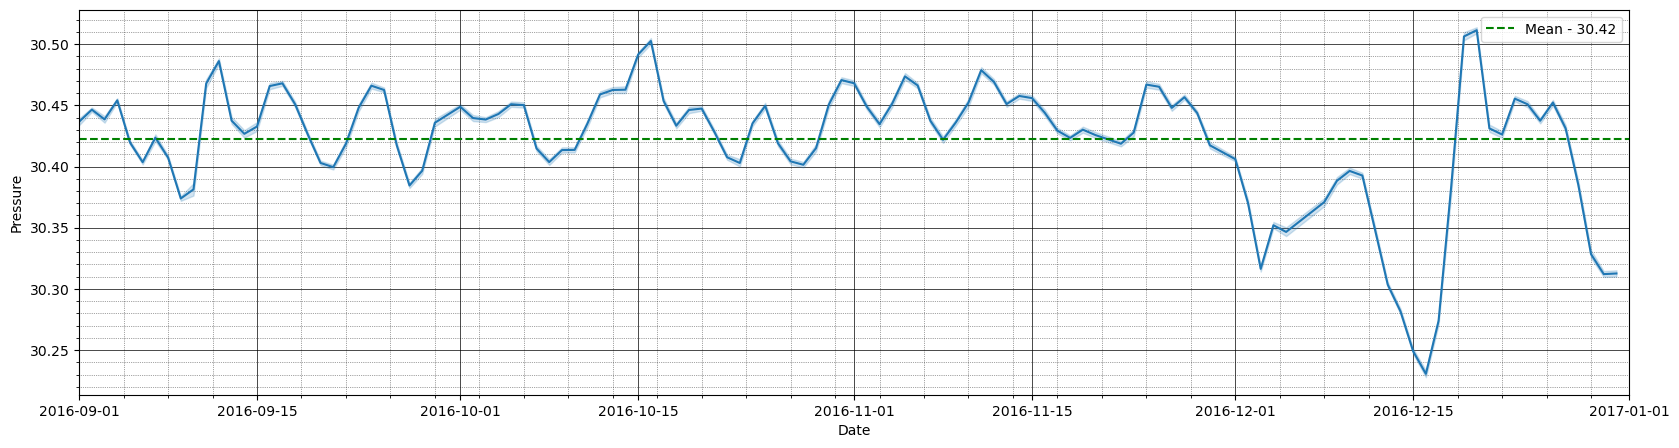

In [10]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Pressure")

mean_avg=dataset['Pressure'].mean()
ax.axhline(mean_avg, color='green', linestyle='--', label=f"Mean - {mean_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

ax.legend();

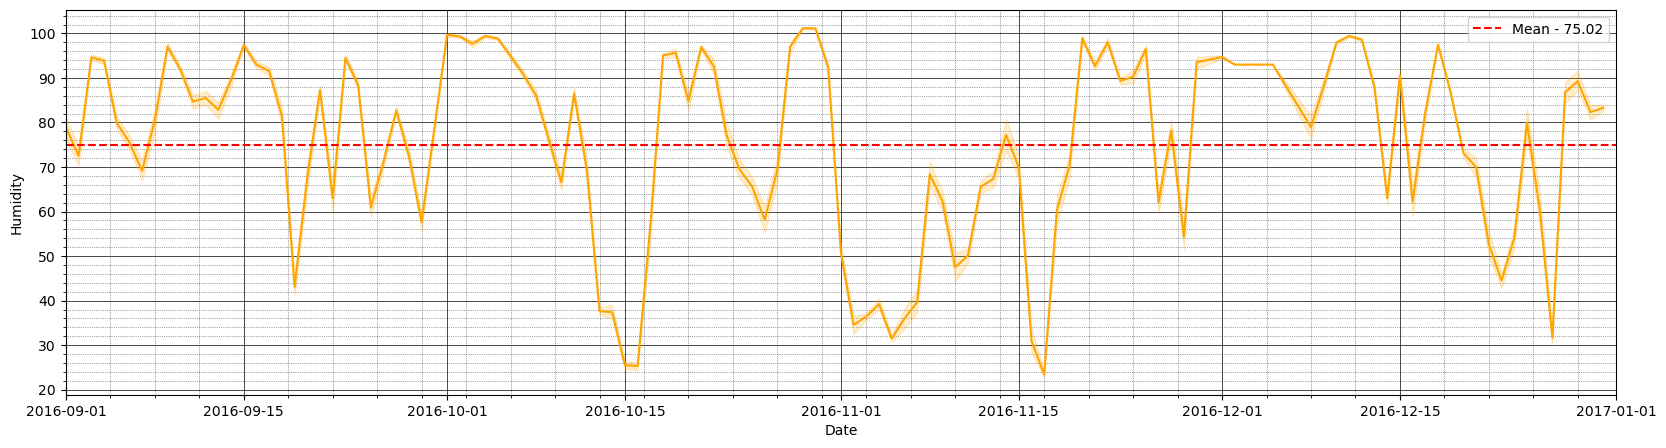

In [11]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Humidity",color = "orange")

mean_avg=dataset['Humidity'].mean()
ax.axhline(mean_avg, color='red', linestyle='--', label=f"Mean - {mean_avg:.2f}")

ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

ax.legend();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


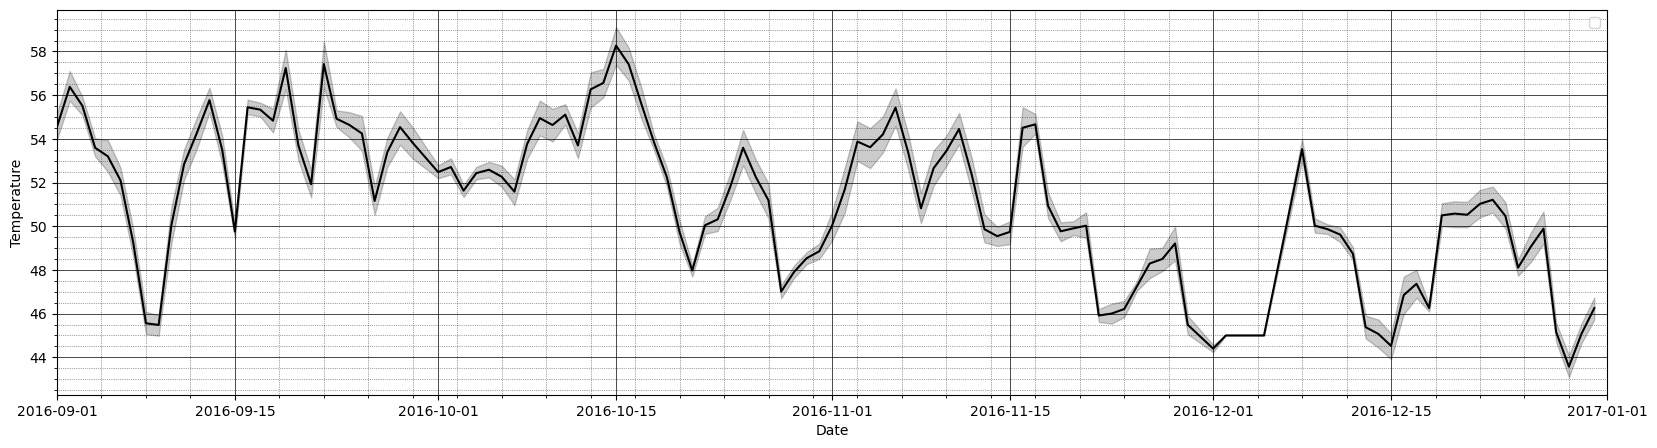

In [12]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(data=dataset, x="Date", y="Temperature",color = "black")


ax.set_axisbelow(True)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth=0.5, color='black',)
ax.grid(which='minor', linestyle=':', linewidth=0.5, color='black', alpha=0.7)

ax.set_xlim([datetime(2016,9,1), datetime(2017,1,1)])

ax.legend();

<Axes: >

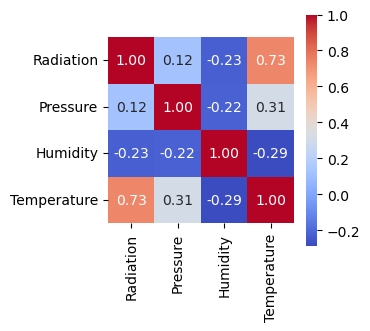

In [21]:
corr = dataset[['Radiation','Pressure','Humidity','Temperature']].corr(method = "pearson")

# corr = wine_data.corr(method = "spearman")
# corr = wine_data.corr(method = "kendall")

f, ax = plt.subplots(figsize=(3, 3))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap="coolwarm", square=True, ax=ax, annot=True, fmt=".2f")


In [13]:
dataset.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Hour', 'Month',
       'Date', 'Total_time'],
      dtype='object')

In [14]:
X = dataset[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed',
             'MonthOfYear', 'DayOfYear', 'WeekOfYear', 'Total_time']]

y = dataset['Radiation']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
X.head()

Temperature  Pressure  Humidity  \
UNIXTime                                                     
2016-09-01 00:00:08-10:00           51     30.43       103   
2016-09-01 00:05:10-10:00           51     30.43       103   
2016-09-01 00:20:06-10:00           51     30.43       103   
2016-09-01 00:25:05-10:00           51     30.43       103   
2016-09-01 00:30:09-10:00           51     30.43       103   

                           WindDirection(Degrees)  Speed  MonthOfYear  \
UNIXTime                                                                
2016-09-01 00:00:08-10:00                   77.27  11.25            9   
2016-09-01 00:05:10-10:00                  153.44   9.00            9   
2016-09-01 00:20:06-10:00                  142.04   7.87            9   
2016-09-01 00:25:05-10:00                  144.12  18.00            9   
2016-09-01 00:30:09-10:00                   67.42  11.25            9   

                           DayOfYear  WeekOfYear  Total_time  
UNIXTime                                                      
2016-09-01 00:00:08-10:00        245          35          12  
2016-09-01 00:05:10-10:00        245          35          12  
2016-09-01 00:20:06-10:00        245          35          12  
2016-09-01 00:25:05-10:00        245          35          12  
2016-09-01 00:30:09-10:00        245          35          12

In [17]:
y.head()

UNIXTime
2016-09-01 00:00:08-10:00    2.58
2016-09-01 00:05:10-10:00    2.83
2016-09-01 00:20:06-10:00    2.16
2016-09-01 00:25:05-10:00    2.21
2016-09-01 00:30:09-10:00    2.25
Name: Radiation, dtype: float64

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression

from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import median_absolute_error, mean_poisson_deviance, mean_gamma_deviance
from sklearn.model_selection import KFold

import warnings
warnings.filterwarnings("ignore")



[  1.2381 895.5654 368.0273 ... 493.1869   2.3381   3.6091]


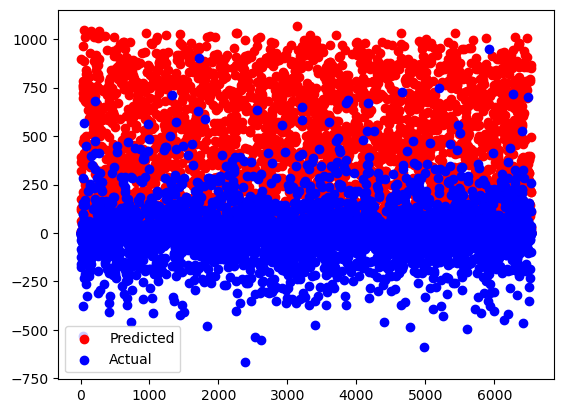

In [19]:



#predict data using random forest regressor

rf_regressor = RandomForestRegressor()

# fit the model on training data
rf_regressor.fit(X_train, y_train)

# predict on test data
y_pred = rf_regressor.predict(X_test)
print(y_pred)

plt.scatter(range(len(y_pred)),y_pred,color='red', label='Predicted')
plt.scatter(range(len(y_test - y_pred)),y_test - y_pred,color='blue', label='Actual')
plt.legend()
plt.show()

[303.54012018 684.80576226 253.79717735 ... 302.34981878  10.89247829
 -54.46820764]


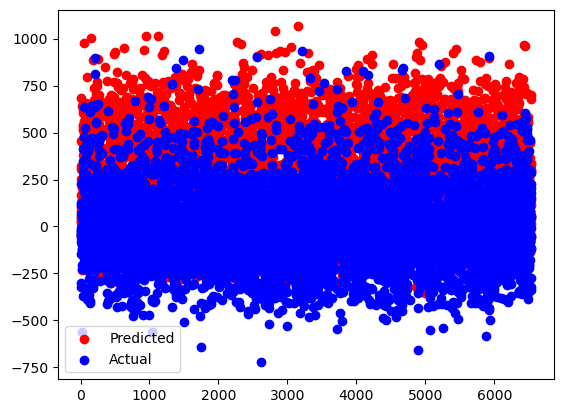

In [20]:
#predict data using linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(y_pred)

plt.scatter(range(len(y_pred)),y_pred,color='red', label='Predicted')
plt.scatter(range(len(y_test - y_pred)),y_test - y_pred,color='blue', label='Actual')
plt.legend()
plt.show()

[245.99380769 778.40579457 370.37683009 ... 370.37683009  14.45452412
  14.45452412]


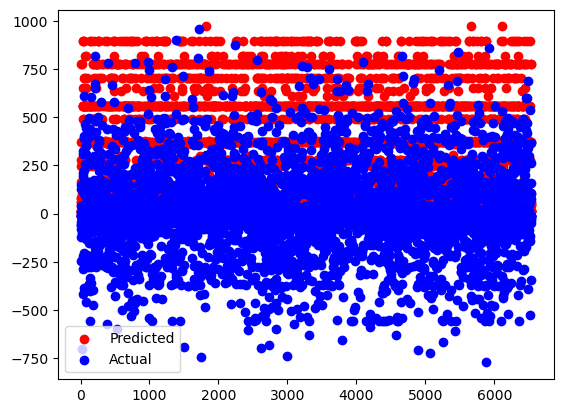

In [21]:
# Create an instance of DecisionTreeRegressor with desired hyperparameters
regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
# Fit the regressor to your training data
regressor.fit(X_train, y_train)
# Use the regressor to generate predictions on new data
y_pred = regressor.predict(X_test)

print(y_pred)

plt.scatter(range(len(y_pred)),y_pred,color='red', label='Predicted')
plt.scatter(range(len(y_test - y_pred)),y_test - y_pred,color='blue', label='Actual')
plt.legend()
plt.show()

[ 44.214 710.656  84.93  ... 596.4     1.218   7.268]


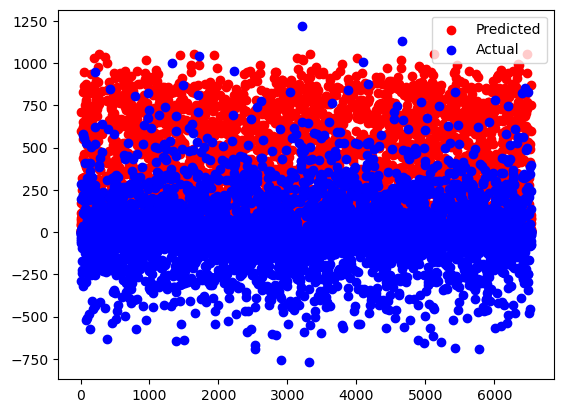

In [22]:


# Create a k-nearest neighbor regressor with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = knn_regressor.predict(X_test)

# Print the predicted target values
print(y_pred)

plt.scatter(range(len(y_pred)),y_pred,color='red', label='Predicted')
plt.scatter(range(len(y_test - y_pred)),y_test - y_pred,color='blue', label='Actual')
plt.legend()
plt.show()

In [23]:
models=[("Linear Regression", LinearRegression()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("KNeighbors", KNeighborsRegressor())]

all_data=[]
scoring = {'r2': 'r2',
           'root_mean_squared_error': 'neg_root_mean_squared_error',
           'mean_absolute_error': 'neg_mean_absolute_error',
           'mean_squared_error': 'neg_mean_squared_error', 
           'max_error': 'max_error'}

for name, model in models:
    results = cross_validate(model, X_train, y_train, cv=10, scoring=scoring)
    all_data.append({'model':name, 'score':results})
    print(f"\x1b[96m{name}\x1b[0m: \x1b[93m{results['test_r2'].mean():.6f}\x1b[0m ± {results['test_r2'].std():.4f}")

Linear Regression: 0.599786 ± 0.0151
Decision Tree: 0.765638 ± 0.0181
Random Forest: 0.876297 ± 0.0086
KNeighbors: 0.711974 ± 0.0111


In [24]:
performance = {'model':[], 'rmse':[], 'mse':[], 'r2':[], 'mae':[], 'me':[]}

for d in all_data:   
    performance['model'].append(d['model'])
    performance['r2'].append(np.abs(d['score']['test_r2'].mean())*100)
    performance['mse'].append(np.abs(d['score']['test_mean_squared_error'].mean()))
    performance['rmse'].append(np.abs(d['score']['test_root_mean_squared_error'].mean()))
    performance['mae'].append(np.abs(d['score']['test_mean_absolute_error'].mean()))
    performance['me'].append(np.abs(d['score']['test_max_error'].mean()))
df_test=pd.DataFrame(performance, index=performance['model'], columns=['rmse', 'r2', 'mae'])

fig = px.bar(df_test, barmode='group', title='Model Comparison')
fig.show()

In [25]:
df_test=pd.DataFrame(performance, index=performance['model'], columns=['mse'])

fig = px.bar(df_test, barmode='group', title='Model Comparison')
fig.show()